# Bayesian Inference on Sales AB Test

## Import Libraries

In [ ]:
# Import Libraries
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
import pandas as pd
import numpy as np

In [17]:


# Set random seed for reproducibility
np.random.seed(42)

# Define the number of rows in the dataset
num_rows = 1000

# Generate customer IDs
customer_ids = np.arange(1, num_rows + 1)

# Generate website versions (50/50 split)
website_versions = np.random.choice(['Version A', 'Version B'], size=num_rows, p=[0.5, 0.5])

# Generate sales amounts (right-skewed from $10 to $1000)
sales = np.random.lognormal(mean=np.log(100), sigma=1, size=num_rows)

# Create a DataFrame
df = pd.DataFrame({
    'CustomerID': customer_ids,
    'WebsiteVersion': website_versions,
    'Sales': sales
})

# Display the first few rows of the DataFrame
print(df.head())

   CustomerID WebsiteVersion       Sales
0           1      Version A  119.446812
1           2      Version B   26.306757
2           3      Version B  146.257393
3           4      Version B  184.150974
4           5      Version A  175.030568


In [18]:
df.shape

(1000, 3)

In [19]:


# Define the observed sales data for each website version
sales_version_A = df[df['WebsiteVersion'] == 'Version A']['Sales'].values
sales_version_B = df[df['WebsiteVersion'] == 'Version B']['Sales'].values

# Define the prior distributions for the mean and standard deviation of sales for each version
with pm.Model() as model:
    # Priors for the mean sales of each version (assuming normal distributions)
    mean_sales_version_A = pm.Normal('mean_sales_version_A', mu=100, sigma=100)
    mean_sales_version_B = pm.Normal('mean_sales_version_B', mu=100, sigma=100)
    
    # Priors for the standard deviation of sales of each version (assuming half-normal distributions)
    std_sales_version_A = pm.HalfNormal('std_sales_version_A', sigma=100)
    std_sales_version_B = pm.HalfNormal('std_sales_version_B', sigma=100)
    
    # Likelihood of the observed sales data given the means and standard deviations
    sales_likelihood_version_A = pm.Normal('sales_likelihood_version_A', mu=mean_sales_version_A, sigma=std_sales_version_A, observed=sales_version_A)
    sales_likelihood_version_B = pm.Normal('sales_likelihood_version_B', mu=mean_sales_version_B, sigma=std_sales_version_B, observed=sales_version_B)
    
    trace = pm.sample(1000, tune=1000, cores=1)  # Adjust the number of samples and tuning steps as needed


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [mean_sales_version_A, mean_sales_version_B, std_sales_version_A, std_sales_version_B]


Output()

Sampling: [mean_sales_version_A, mean_sales_version_B, sales_likelihood_version_A, sales_likelihood_version_B, std_sales_version_A, std_sales_version_B]


KeyError: 'mean_sales_version_A'

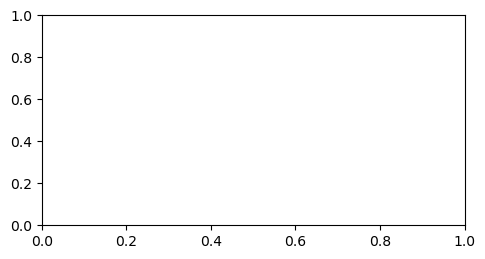

In [9]:


# Number of samples to draw from the priors
num_samples = 1000

# Sample from the prior distributions
with model:
    prior_samples = pm.sample_prior_predictive(samples=num_samples)

# Plot the samples from the prior distributions
plt.figure(figsize=(12, 6))

# Plot samples from the prior distribution of mean sales for version A
plt.subplot(2, 2, 1)
plt.hist(prior_samples['mean_sales_version_A'], bins=30, density=True, alpha=0.6, color='blue')
plt.title('Prior Distribution of Mean Sales (Version A)')
plt.xlabel('Mean Sales')
plt.ylabel('Density')

# Plot samples from the prior distribution of mean sales for version B
plt.subplot(2, 2, 2)
plt.hist(prior_samples['mean_sales_version_B'], bins=30, density=True, alpha=0.6, color='green')
plt.title('Prior Distribution of Mean Sales (Version B)')
plt.xlabel('Mean Sales')
plt.ylabel('Density')

# Plot samples from the prior distribution of standard deviation for version A
plt.subplot(2, 2, 3)
plt.hist(prior_samples['std_sales_version_A'], bins=30, density=True, alpha=0.6, color='blue')
plt.title('Prior Distribution of Std Dev (Version A)')
plt.xlabel('Std Dev')
plt.ylabel('Density')

# Plot samples from the prior distribution of standard deviation for version B
plt.subplot(2, 2, 4)
plt.hist(prior_samples['std_sales_version_B'], bins=30, density=True, alpha=0.6, color='green')
plt.title('Prior Distribution of Std Dev (Version B)')
plt.xlabel('Std Dev')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


c:\Users\wallj\anaconda3\envs\pymc_env\Lib\site-packages\arviz\data\base.py:265: UserWarning: More chains (4) than draws (2). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


KeyError: 'var names: "[\'mean_sales_version_A\' \'mean_sales_version_B\'] are not present" in dataset'

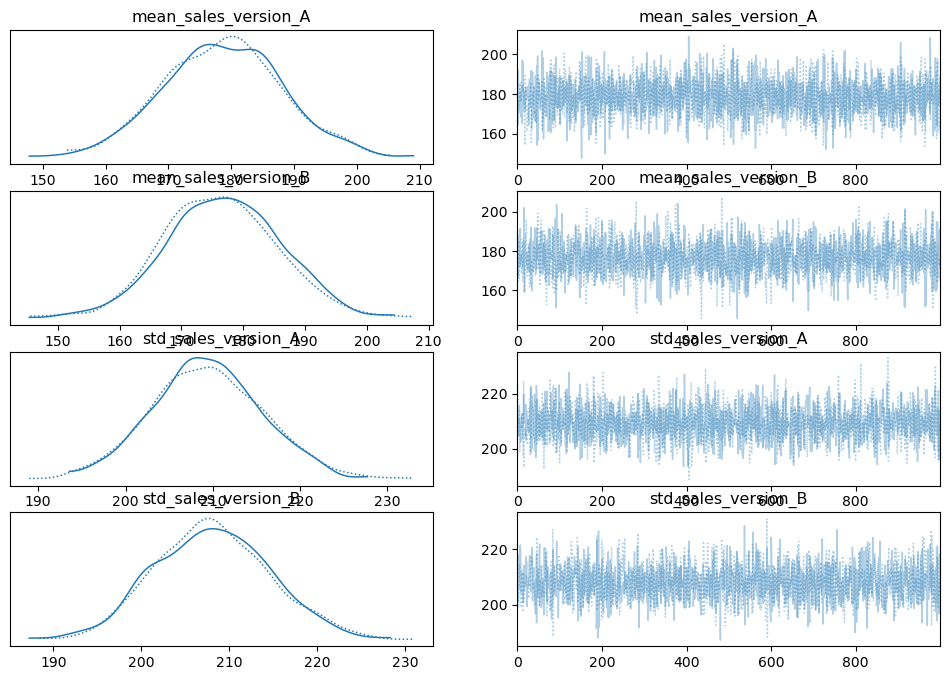

In [16]:


# Convert the PyMC3 trace to an ArviZ InferenceData object
idata = az.plot_trace(trace)

# Specify the parameters to plot
parameters = ["mean_sales_version_A", "mean_sales_version_B"]

# Create the Forest plot
az.plot_forest(idata, var_names=parameters, combined=True, hdi_prob=0.95)

# Show the plot
plt.show()
